In [1]:
import matplotlib.pyplot as plt

from src.data_ag.exchange_rate import  get_exchange_rate
from src.data_ag.ids import Adm0CodeManager

In [2]:
adm_manager = Adm0CodeManager()
country_name = "Syrian Arab Republic"
adm0_code = adm_manager.get_code_for_country(country_name)
print(f"adm0_code: {adm0_code}")

start_date="2023-01-01"
end_date="2025-04-30"


adm0_code: 238


## exchange rates

In [3]:
official_exchange_rate = get_exchange_rate(start_date, end_date, adm0_code, rate_type="Official")
parallel_exchange_rate = get_exchange_rate(start_date, end_date, adm0_code, rate_type="Parallel")

parallel_exchange_rate.head()

Loading cached CSV from ./cache/download_exchange_rates_f5c768186c63b64e4f45eae2281d73dd.csv
Loading cached CSV from ./cache/download_exchange_rates_60509a4f27499adc2eff089d556fe168.csv


,IndicatorType,CountryName,MarketName,CurrencyCode,Date,Value,SourceOfTheData
10106,Parallel,Syrian Arab Republic,Maskanah,SYP,2023-02-06,7300.0,WFP Syria CO
10107,Parallel,Syrian Arab Republic,Al Kom,SYP,2023-02-06,7150.0,WFP Syria CO
10108,Parallel,Syrian Arab Republic,Harem,SYP,2023-02-06,6850.0,WFP Syria CO
10109,Parallel,Syrian Arab Republic,Jisr al shughur,SYP,2023-02-06,6700.0,WFP Syria CO
10110,Parallel,Syrian Arab Republic,Bu Kamal,SYP,2023-02-06,6770.0,WFP Syria CO


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def preprocess_monthly(df, date_col='Date', value_col='Value'):
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col], dayfirst=True)
    df.set_index(date_col, inplace=True)
    return df[value_col].resample('M').agg(['mean','min','max'])

# build your monthly summaries
official_monthly = preprocess_monthly(official_exchange_rate)
parallel_monthly = preprocess_monthly(parallel_exchange_rate)

parallel_monthly.head()


,mean,min,max
Date,,,
2023-02-28,7106.407986,6500.0,7500.000
2023-03-31,7471.532986,7267.0,7900.000
2023-04-30,NaN,NaN,NaN
2023-05-31,8724.175925,8100.0,9072.619
2023-06-30,8861.173077,8600.0,9000.000


In [5]:
official_exchange_rate.head()

,IndicatorType,CountryName,MarketName,CurrencyCode,Date,Value,SourceOfTheData
4012,Official,Syrian Arab Republic,NaN,SYP,2023-01-01,2511.0,Trading Economics
4013,Official,Syrian Arab Republic,NaN,SYP,2023-01-02,2511.0,Trading Economics
4014,Official,Syrian Arab Republic,NaN,SYP,2023-01-03,2510.0,Trading Economics
4015,Official,Syrian Arab Republic,NaN,SYP,2023-01-04,2511.0,Trading Economics
4016,Official,Syrian Arab Republic,NaN,SYP,2023-01-05,2510.0,Trading Economics


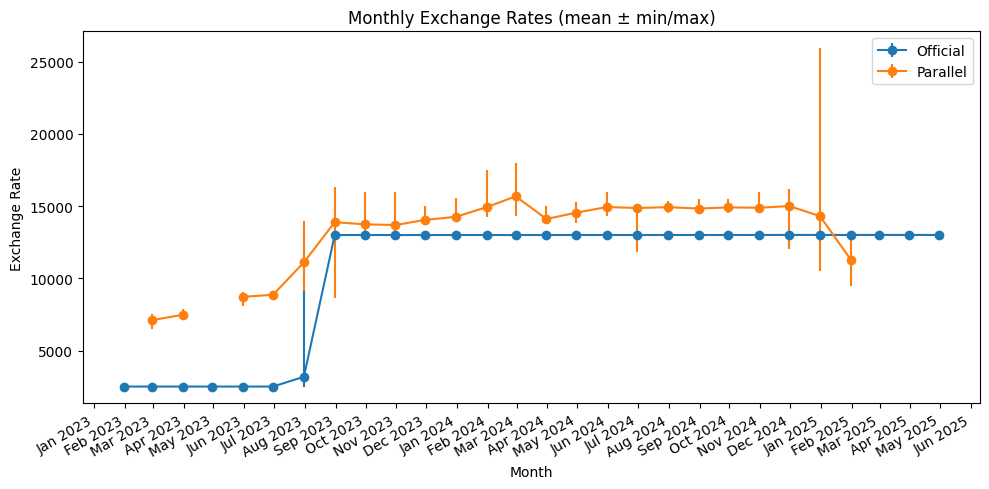

In [6]:


fig, ax = plt.subplots(figsize=(10, 5))

# Official
y_off = official_monthly['mean']
err_off = [y_off - official_monthly['min'], official_monthly['max'] - y_off]
ax.errorbar(
    official_monthly.index, y_off,
    yerr=err_off,
    marker='o', linestyle='-',
    label='Official'
)

# Parallel
y_par = parallel_monthly['mean']
err_par = [y_par - parallel_monthly['min'], parallel_monthly['max'] - y_par]
ax.errorbar(
    parallel_monthly.index, y_par,
    yerr=err_par,
    marker='o', linestyle='-',
    label='Parallel'
)

# formatting
ax.set_xlabel('Month')
ax.set_ylabel('Exchange Rate')
ax.set_title('Monthly Exchange Rates (mean ± min/max)')
ax.legend()

# <— NEW: show every month on the x–axis
ax.xaxis.set_major_locator(mdates.MonthLocator())              # one tick per month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))    # e.g. "Apr 2025"

fig.autofmt_xdate()   # rotate & align
plt.tight_layout()
plt.show()


## commodity prices

In [7]:
from src.data_ag.market import download_market_assessment
from src.data_ag.ids import MarketIdsManager

marker_manager = MarketIdsManager()

market_assessment = download_market_assessment(
    adm0_codes=[adm0_code],
    market_ids=marker_manager.get_market_ids_for_coutry("Syrian Arab Republic"),
    start_date=start_date,
    end_date=end_date,
)

market_assessment.head()

# plot MDIScore vs date?

Loading cached CSV from ./cache/download_market_ids_950d4b254446d67ab0f3a1ea6e15cf16.csv
Loading cached CSV from ./cache/download_market_assessment_dc00d899173ba73e6fd5afb84beafd71.csv


,CountryName,Adm1Name,Adm2Name,MarketID,MarketName,SurveyID,SurveyDate,MFIRiskLevel,MFIScore,Assortment,Availability,Price,Resilience,Competition,Infrastructure,Service,Quality,AccessProtection,SurveyType
0,Syrian Arab Republic,Al-Hasakeh,Quamishli,1125,Quamishli,2791,01/06/2023,Very High Risk,3.991676,5.0,10.000000,0.000000,7.5,10.0,10.000000,5.000000,10.00,10.0,Full
1,Syrian Arab Republic,Deir-ez-Zor,Al Mayadin,5257,Sbeikhan,2791,01/06/2023,Very High Risk,2.930879,4.0,8.333333,0.000000,7.5,10.0,5.714286,1.666667,1.25,10.0,Full
2,Syrian Arab Republic,Rural Damascus,Rural Damascus,1354,Jaramana,2791,01/06/2023,Medium Risk,5.278072,9.0,10.000000,2.500000,7.5,10.0,7.142857,3.333333,8.75,10.0,Full
3,Syrian Arab Republic,Al-Hasakeh,Quamishli,1125,Quamishli,4970,22/01/2025,Low Risk,6.475245,5.0,10.000000,5.000000,10.0,NaN,NaN,NaN,NaN,NaN,Reduced
4,Syrian Arab Republic,Rural Damascus,Rural Damascus,2687,Saqba,2791,01/06/2023,Medium Risk,6.055994,8.0,10.000000,4.166667,7.5,10.0,6.428571,5.000000,6.25,10.0,Full


In [8]:
market_ass_monthly = preprocess_monthly(
    market_assessment,
    date_col="SurveyDate",
    value_col="MFIScore"
)
market_ass_monthly.head()

,mean,min,max
SurveyDate,,,
2023-01-31,7.932304,7.318387,8.179647
2023-02-28,NaN,NaN,NaN
2023-03-31,NaN,NaN,NaN
2023-04-30,NaN,NaN,NaN
2023-05-31,NaN,NaN,NaN


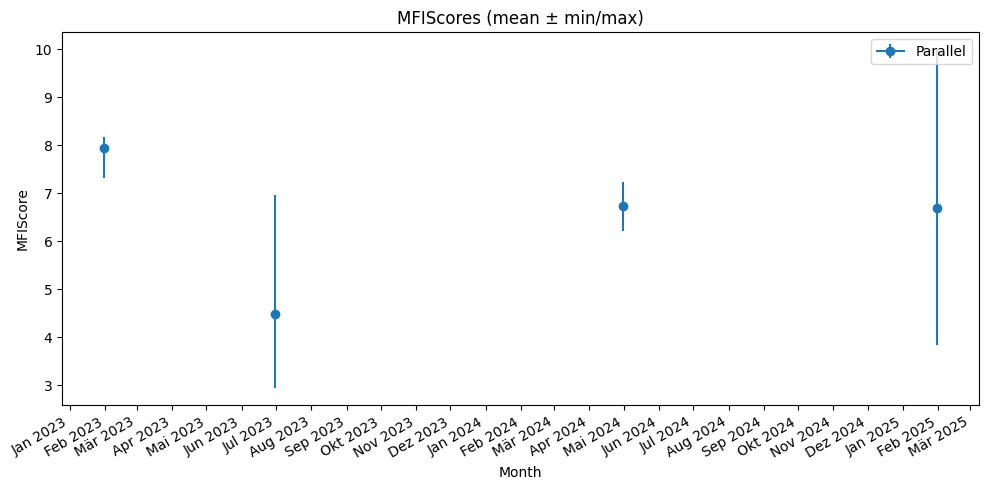

In [22]:
def plot_market_MFI(
    market_ass_monthly: pd.DataFrame,
):
    fig, ax = plt.subplots(figsize=(10, 5))


    # Parallel
    y_par = market_ass_monthly['mean']
    err_par = [y_par - market_ass_monthly['min'], market_ass_monthly['max'] - y_par]
    ax.errorbar(
        market_ass_monthly.index, y_par,
        yerr=err_par,
        marker='o', linestyle='-',
        label='Parallel'
    )

    # formatting
    ax.set_xlabel('Month')
    ax.set_ylabel('MFIScore')
    ax.set_title('MFIScores (mean ± min/max)')
    ax.legend()

    # <— NEW: show every month on the x–axis
    ax.xaxis.set_major_locator(mdates.MonthLocator())              # one tick per month
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))    # e.g. "Apr 2025"

    fig.autofmt_xdate()   # rotate & align
    plt.tight_layout()
    plt.show()


plot_market_MFI(market_ass_monthly)

## plot markets

In [12]:
from src.data_ag.prices import download_prices
from src.data_ag.ids import ComodityIdsManager

comm_ids = ComodityIdsManager()



prices_data = download_prices(
    start_date=start_date,
    end_date=end_date,
    commodity_ids=comm_ids.get_all_ids(),
    market_ids=marker_manager.get_market_ids_for_coutry("Syrian Arab Republic"),
)

prices_data.head()

Loading cached CSV from ./cache/downlaod_comodity_ids_44e701bb39f5181ded684a5133c82caa.csv
Cached CSV saved to ./cache/download_prices_77a6587bd13540f64d835e5c20f1eff3.csv


,Country,Admin 1,Admin 2,Market Name,Commodity,Price Type,Price Date,Collection Frequency,Price,Unit,Currency,Data Source,Trend,Pewi,ALPS Phase,Data Type,Upper (95%) CI,Lower (95%) CI,Forecast Methodology
0,Syrian Arab Republic,Aleppo,A'zaz,A'zaz,Alcohol (spray),Retail,15/01/2023,Weekly,7200.000000,200 ML,SYP,WFP Syria CO,5544.3643,1.9230,Alert,Aggregated,NaN,NaN,NaN
1,Syrian Arab Republic,Aleppo,A'zaz,A'zaz,Alcohol (spray),Retail,15/02/2023,Weekly,7531.884056,200 ML,SYP,WFP Syria CO,5818.7856,1.9897,Alert,Aggregated,NaN,NaN,NaN
2,Syrian Arab Republic,Aleppo,A'zaz,A'zaz,Alcohol (spray),Retail,15/03/2023,Weekly,7808.731164,200 ML,SYP,WFP Syria CO,6084.7739,1.9801,Alert,Aggregated,NaN,NaN,NaN
3,Syrian Arab Republic,Aleppo,A'zaz,A'zaz,Alcohol (spray),Retail,15/04/2023,Weekly,8067.000000,200 ML,SYP,WFP Syria CO,6460.4233,1.7482,Alert,Aggregated,NaN,NaN,NaN
4,Syrian Arab Republic,Aleppo,A'zaz,A'zaz,Alcohol (spray),Retail,15/06/2023,Weekly,8475.640958,200 ML,SYP,WFP Syria CO,6799.2456,1.7344,Alert,Aggregated,NaN,NaN,NaN


In [25]:
prices_data.columns

Index(['Country', 'Admin 1', 'Admin 2', 'Market Name', 'Commodity',
       'Price Type', 'Price Date', 'Collection Frequency', 'Price', 'Unit',
       'Currency', 'Data Source', 'Trend', 'Pewi', 'ALPS Phase', 'Data Type',
       'Upper (95%) CI', 'Lower (95%) CI', 'Forecast Methodology'],
      dtype='object')

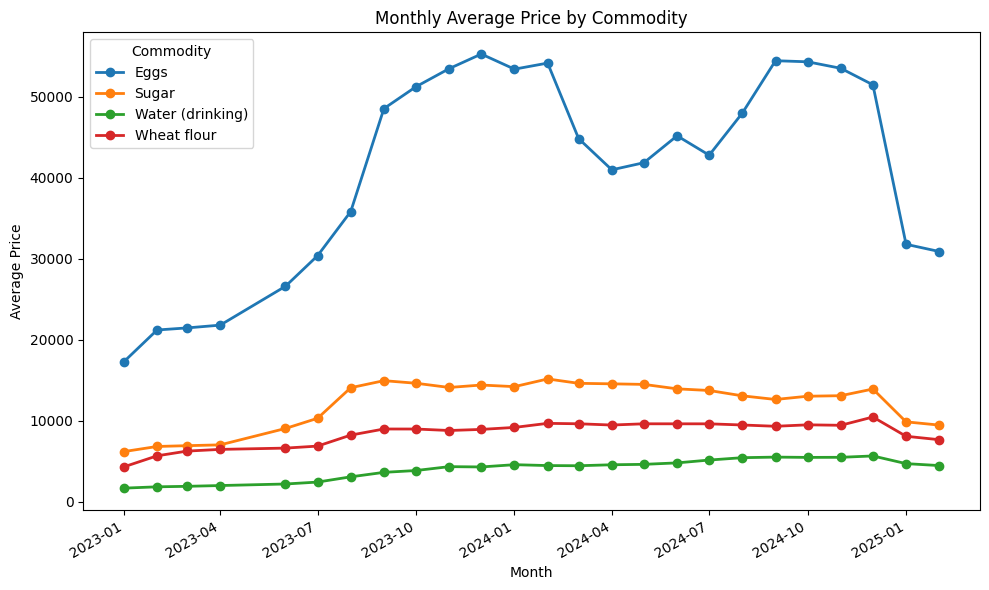

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_commodity_trends(df: pd.DataFrame, commodities: list[str]) -> pd.DataFrame:
    """
    Filter df to only the given commodities, aggregate by calendar month,
    compute average Price, and plot the time‐series.
    
    Parameters
    ----------
    df : pd.DataFrame
        Must contain at least these columns:
        - 'Commodity'
        - 'Price Date' (e.g. '15/01/2023')
        - 'Price' (numeric)
    commodities : list[str]
        List of commodity names to include.
    
    Returns
    -------
    pd.DataFrame
        A pivoted table of average prices with
        index=Month (as Timestamp at first of month),
        columns=Commodity.
    """
    # 1. Filter
    df_filt = df[df['Commodity'].isin(commodities)].copy()
    
    # 2. Parse dates and floor to month
    df_filt['Price Date'] = pd.to_datetime(df_filt['Price Date'], dayfirst=True)
    df_filt['Month'] = df_filt['Price Date'].dt.to_period('M').dt.to_timestamp()
    
    # 3. Group & average
    monthly = (
        df_filt
        .groupby(['Month', 'Commodity'])['Price']
        .mean()
        .reset_index()
        .pivot(index='Month', columns='Commodity', values='Price')
        .sort_index()
    )
    
    # 4. Plot
    ax = monthly.plot(
        marker='o',
        figsize=(10, 6),
        linewidth=2,
        title='Monthly Average Price by Commodity'
    )
    ax.set_xlabel('Month')
    ax.set_ylabel('Average Price')
    ax.legend(title='Commodity')
    plt.tight_layout()
    plt.show()
    
    return monthly


commodities_to_track = [
    # checken eggs, sugar,
    "Sugar",
    "Water (drinking)",
    "Wheat flour",
    "Eggs",
]

monthly_avg_df = plot_commodity_trends(prices_data, commodities_to_track)
# monthly_avg_df.head()

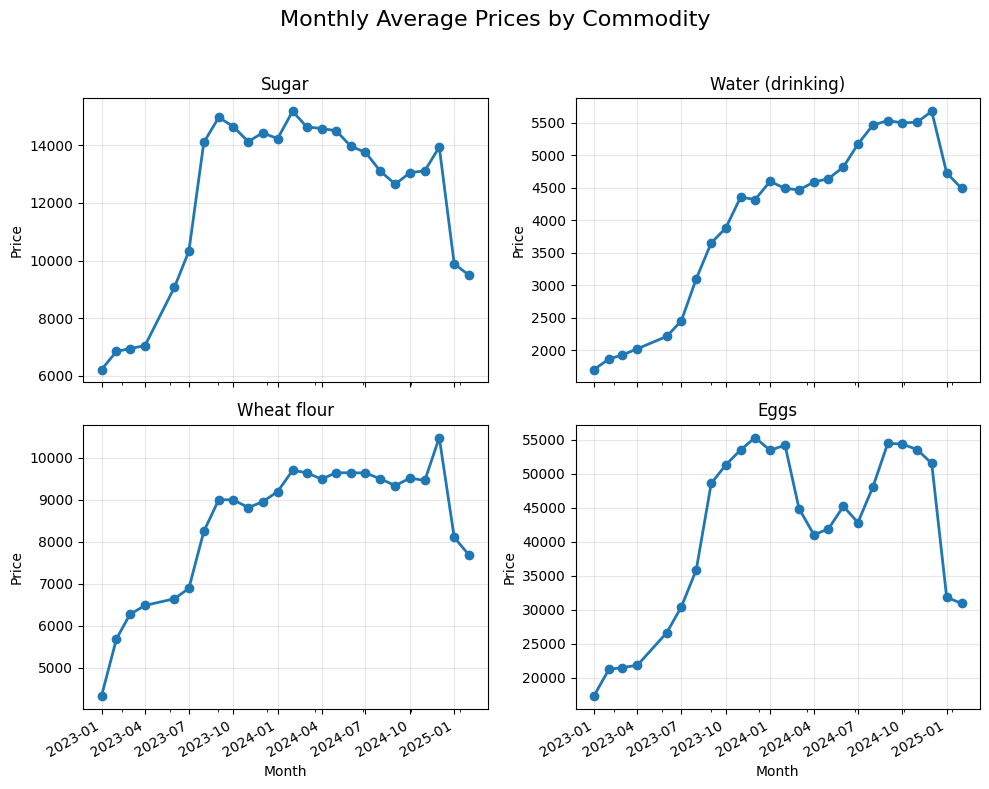

In [24]:
import math

def plot_many_with_independent_axes(monthly: pd.DataFrame, commodities: list[str], ncols: int = 2):
    """
    monthly: DataFrame indexed by Month, columns are commodity names.
    commodities: list of commodity names to plot.
    ncols: how many subplots per row.
    """
    n = len(commodities)
    nrows = math.ceil(n / ncols)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 4*nrows), sharex=True)
    axes = axes.flatten()
    
    for ax, comm in zip(axes, commodities):
        series = monthly.get(comm)
        if series is None:
            ax.set_visible(False)
            continue
        series.plot(ax=ax, marker='o', linewidth=2)
        ax.set_title(comm)
        ax.set_ylabel("Price")
        ax.grid(True, alpha=0.3)
    
    # hide any unused axes
    for ax in axes[n:]:
        ax.set_visible(False)
    
    fig.suptitle("Monthly Average Prices by Commodity", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
plot_many_with_independent_axes(monthly_avg_df, commodities_to_track, ncols=2)